#**Modelos ARIMA**


Modelos ARIMA, su nombre se debe a que es un modelo autoregresivo y media movil es decir el modelo se constituye de un componente a partir de observaciones de periodos pasado y el promedio en una ventana del tiempo.

Para esta aplicación vamos a utilizar una base de datos del precio de la criptomoneda bitcoin.

Estos datos pueden ser descargados en el siguiente [enlace.](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory)

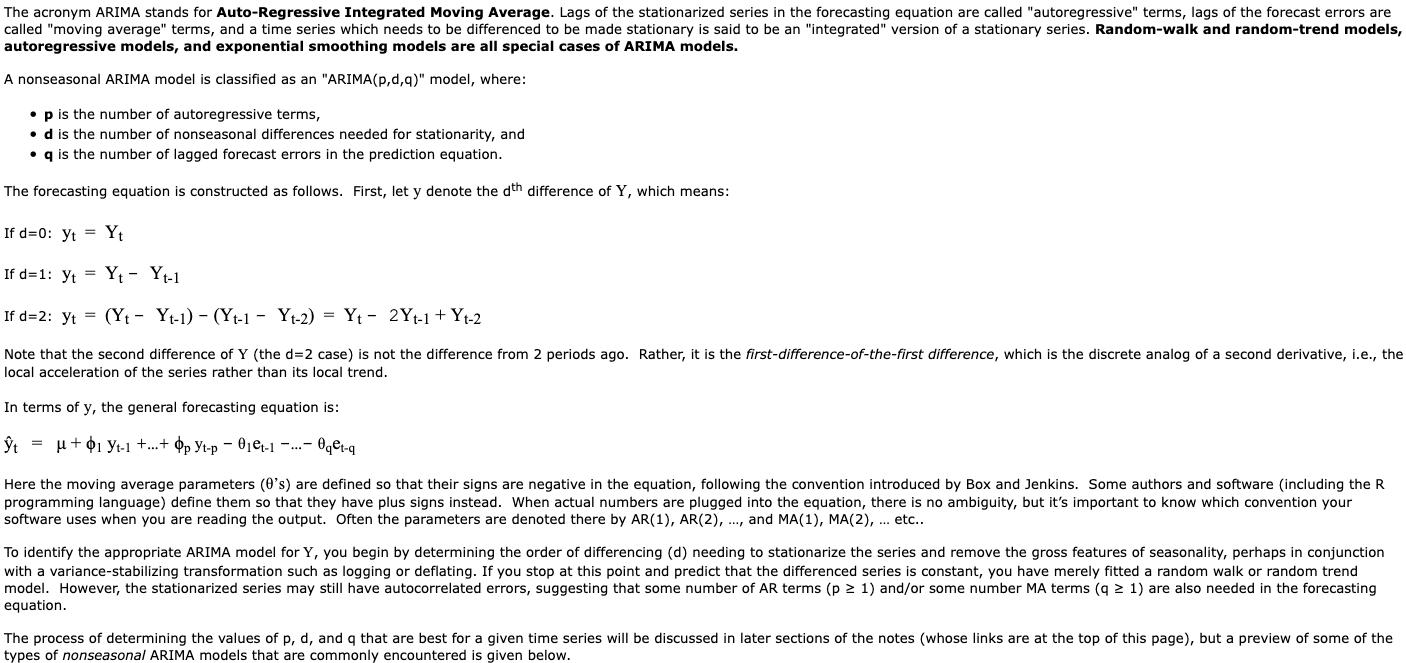

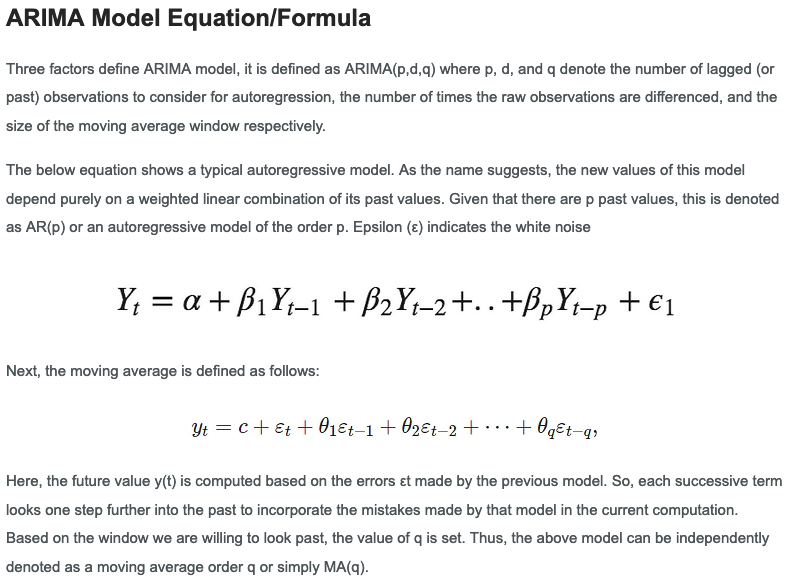

In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'/content'

In [3]:
#Google Drive

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
ls -la gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo

total 23998
-rw------- 1 root root  1006942 May  2  2023 '9.1 Pronósticos con Series de Tiempo.pptx'
-rw------- 1 root root   927029 May  2  2023 '9.2 Herramientas de visualizacion.pdf'
-rw------- 1 root root  1117448 Apr 30 03:16 '9.3 Time Series ARIMA.ipynb'
-rw------- 1 root root  1176480 May 18  2023 '9.4 Modelos ARIMA.ipynb'
-rw------- 1 root root   382265 May 16  2022  coin_Bitcoin.csv
-rw------- 1 root root   240064 May 12  2023  coin_Bitcoin.xlsx
-rw------- 1 root root  1107707 May 18  2022 'Copia de Sample - Superstore.xlsm'
-rw------- 1 root root 12951091 May 16  2022  Forecasting_with_Univariate_Box_-_Jenkins_Models.pdf
-rw------- 1 root root  2770903 May 16  2022 'GARCH_Models_Structure_Statistical_Inference_and_Financial_Applications1 (1).pdf'
-rw------- 1 root root  1298601 May 18  2022 'Superstore(1).xlsx'
-rw------- 1 root root  1592661 May  4  2023  Superstore.xlsx


In [5]:
cd gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo

/content/gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo


In [6]:
ls -la

total 23998
-rw------- 1 root root  1006942 May  2  2023 '9.1 Pronósticos con Series de Tiempo.pptx'
-rw------- 1 root root   927029 May  2  2023 '9.2 Herramientas de visualizacion.pdf'
-rw------- 1 root root  1117448 Apr 30 03:16 '9.3 Time Series ARIMA.ipynb'
-rw------- 1 root root  1176480 May 18  2023 '9.4 Modelos ARIMA.ipynb'
-rw------- 1 root root   382265 May 16  2022  coin_Bitcoin.csv
-rw------- 1 root root   240064 May 12  2023  coin_Bitcoin.xlsx
-rw------- 1 root root  1107707 May 18  2022 'Copia de Sample - Superstore.xlsm'
-rw------- 1 root root 12951091 May 16  2022  Forecasting_with_Univariate_Box_-_Jenkins_Models.pdf
-rw------- 1 root root  2770903 May 16  2022 'GARCH_Models_Structure_Statistical_Inference_and_Financial_Applications1 (1).pdf'
-rw------- 1 root root  1298601 May 18  2022 'Superstore(1).xlsx'
-rw------- 1 root root  1592661 May  4  2023  Superstore.xlsx


##**Leer conjunto de datos**

Como se mencionó la base de datos contiene información sobre el precio de la criptomoneda Bitcoin y Dash, datos diarios entre el 2013 y el 2018 con la siguiente información:



*   Open: precio de apertura
*   High: máximo precio tranzado
*   Low: mínimo precio tranzado
*   Close: precio de cierre
*   Volume: Dinero tranzado
*   Market Cap: Capital de la criptomoneda en dolares.

In [7]:
#bitcoin = pd.read_csv("bitcoin_price.csv",parse_dates=['Date'])
bitcoin = pd.read_csv("coin_Bitcoin.csv",parse_dates=['Date'])
bitcoin = bitcoin.set_index('Date')
bitcoin.sort_index(inplace=True)
bitcoin.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [8]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 233.7+ KB


In [9]:
print(bitcoin['High'].head())
print('')
print(bitcoin['High'].tail())

Date
2013-04-29 23:59:59    147.488007
2013-04-30 23:59:59    146.929993
2013-05-01 23:59:59    139.889999
2013-05-02 23:59:59    125.599998
2013-05-03 23:59:59    108.127998
Name: High, dtype: float64

Date
2021-07-02 23:59:59    33939.588699
2021-07-03 23:59:59    34909.259899
2021-07-04 23:59:59    35937.567147
2021-07-05 23:59:59    35284.344430
2021-07-06 23:59:59    35038.536363
Name: High, dtype: float64


##**Construcción del modelo**
La estructura de un ARIMA se representa como una tupla (1,1,1) el primer y el ultimo elemento  corresponde a la cantidad de periodos involucrados en los elementos AR y MA, el segundo elemento corresponde de diferencias para conseguir estacionalidad.

---

Configuración
Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

Predicción: res.plot_predict(start='inicio', end='fin')



---

Para mayor comprension sobre statmodels: https://github.com/statsmodels/statsmodels/


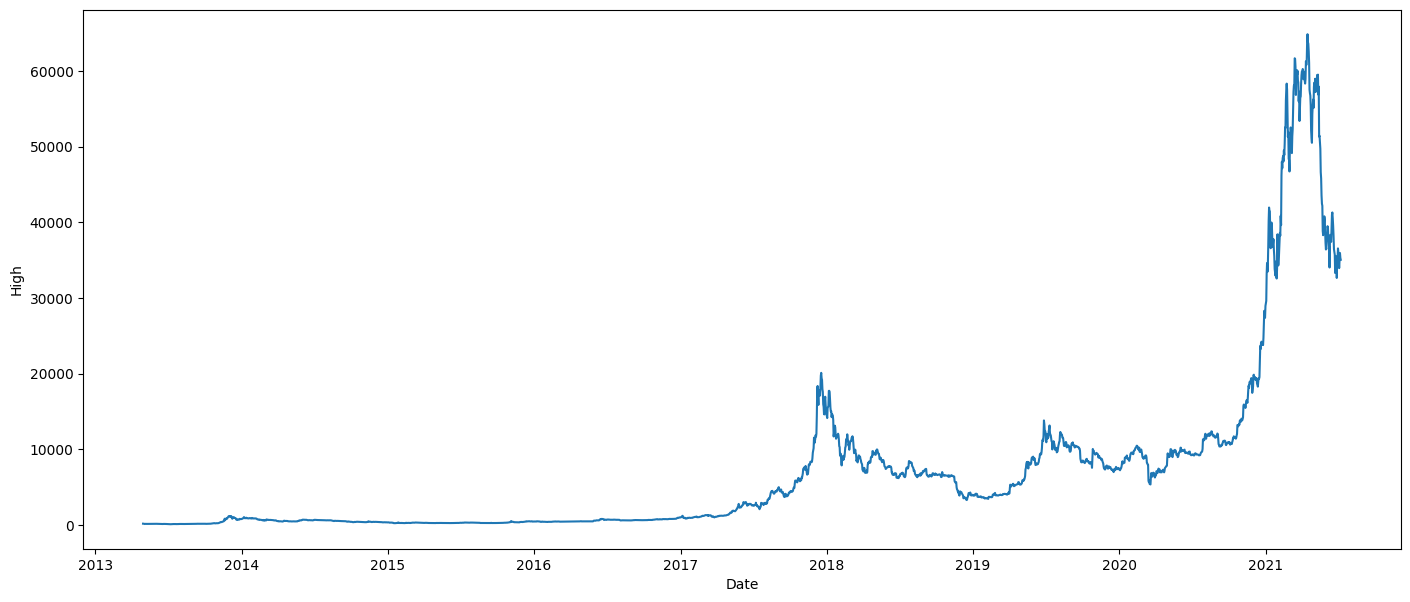

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (17,7))
sns.lineplot(x = 'Date', y = 'High', data = bitcoin)
plt.show()

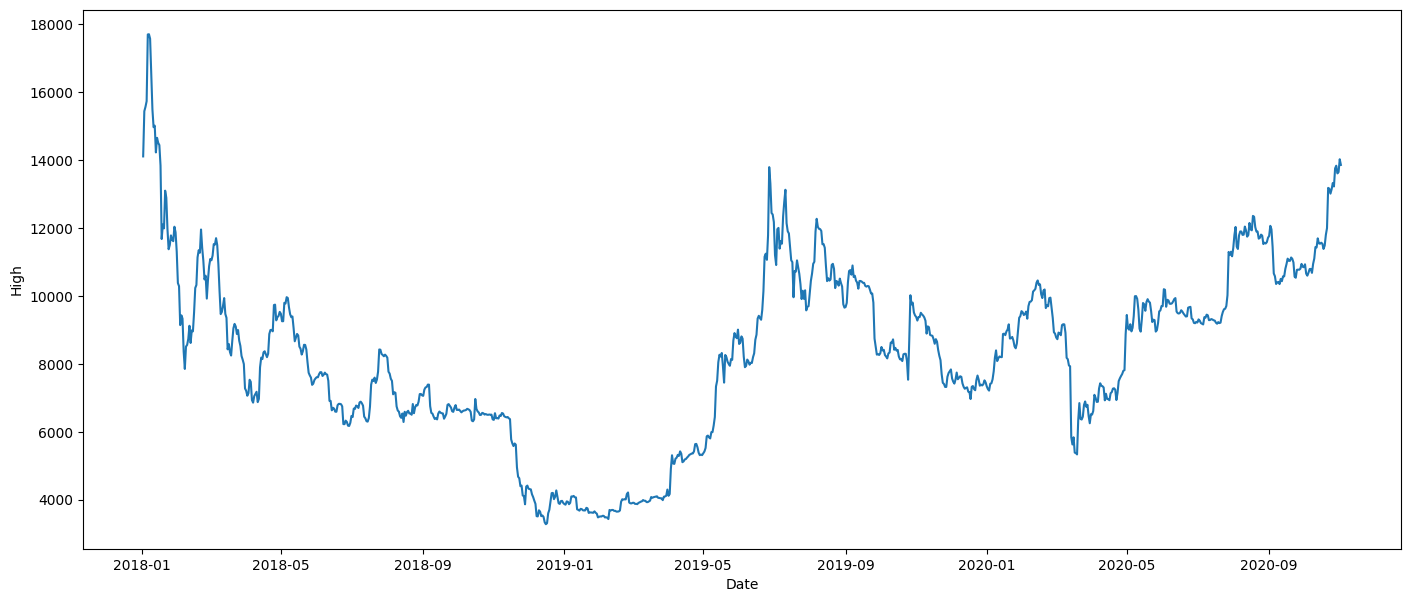

In [11]:
############################################################
# Esta es la muestra de la serie que queremos pronostricar #
############################################################

bit_coint_select=bitcoin.loc['2018-01-01':'2020-11-01']
#(start='2021-01-06', end='2021-08-06')
plt.subplots(figsize = (17,7))
sns.lineplot(x = 'Date', y = 'High', data = bit_coint_select)
plt.show()

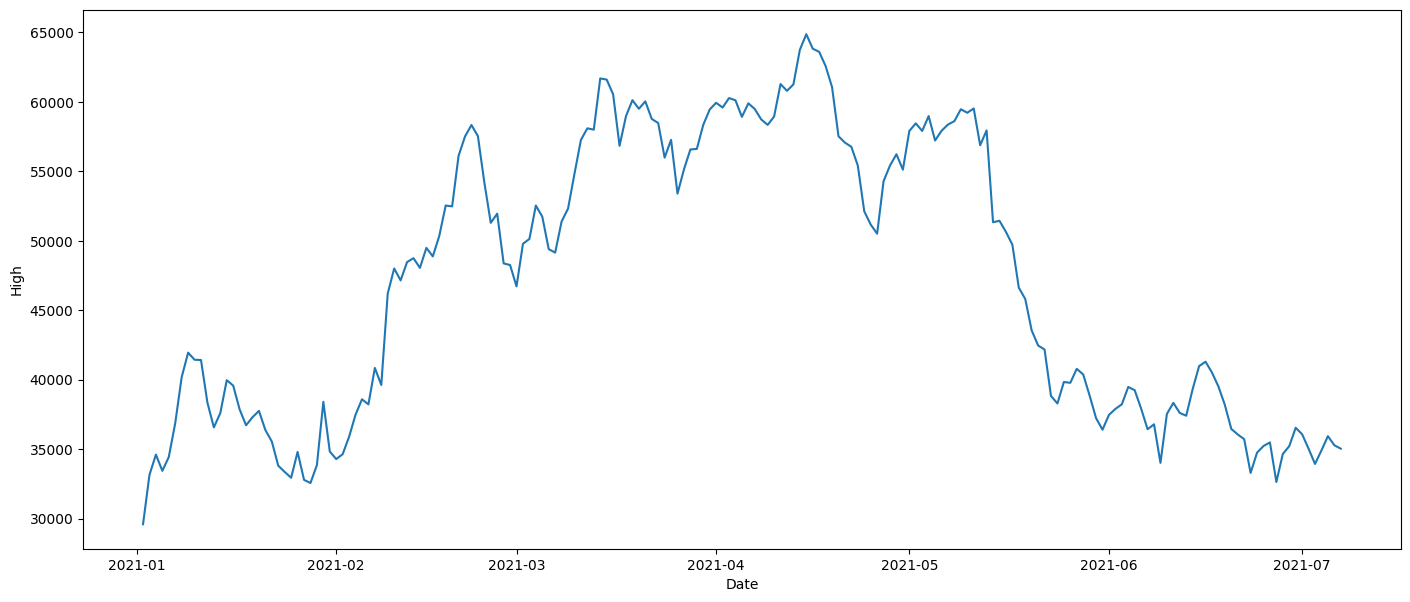

In [ ]:
############################################################
# Esta es la muestra de la serie que queremos pronostricar #
############################################################

bit_coint_select=bitcoin.loc['2021-01-01':'2021-07-31']
#(start='2021-01-06', end='2021-08-06')
plt.subplots(figsize = (17,7))
sns.lineplot(x = 'Date', y = 'High', data = bit_coint_select)
plt.show()

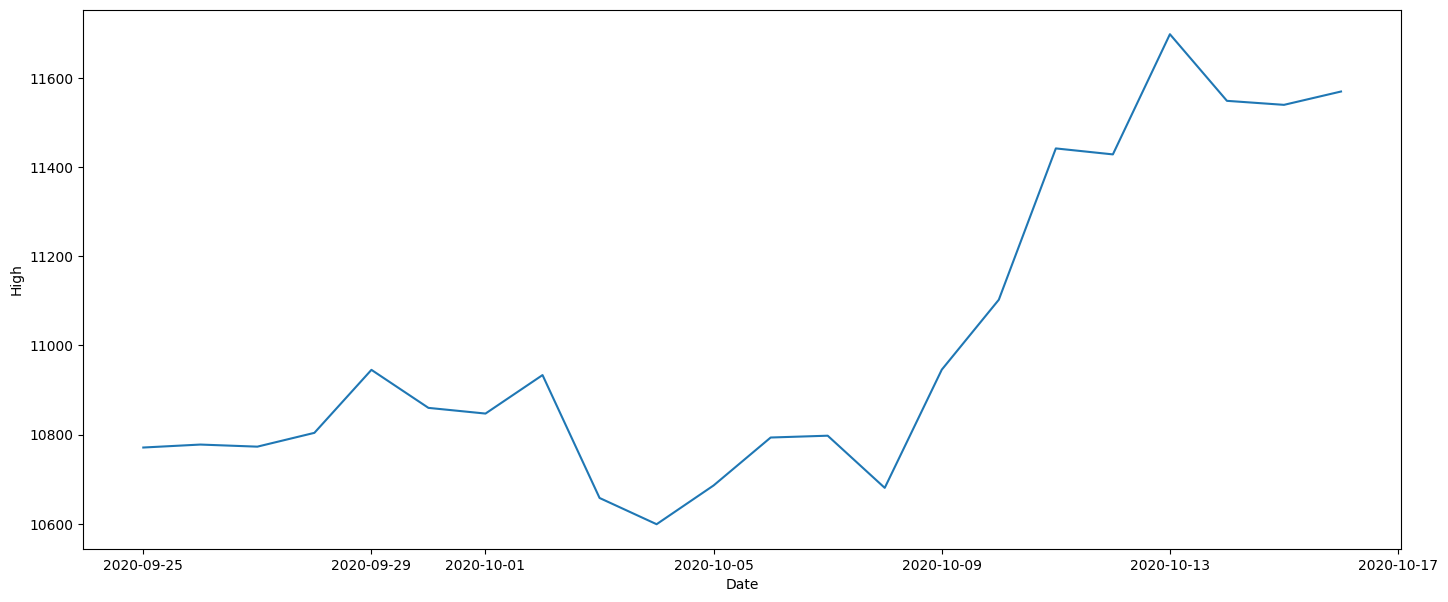

In [12]:
############################################################
# Esta es la muestra de la serie que queremos pronostricar #
############################################################

bit_coint_select=bitcoin.loc['2020-09-24':'2020-10-15']
#(start='2021-01-06', end='2021-08-06')
plt.subplots(figsize = (17,7))
sns.lineplot(x = 'Date', y = 'High', data = bit_coint_select)
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

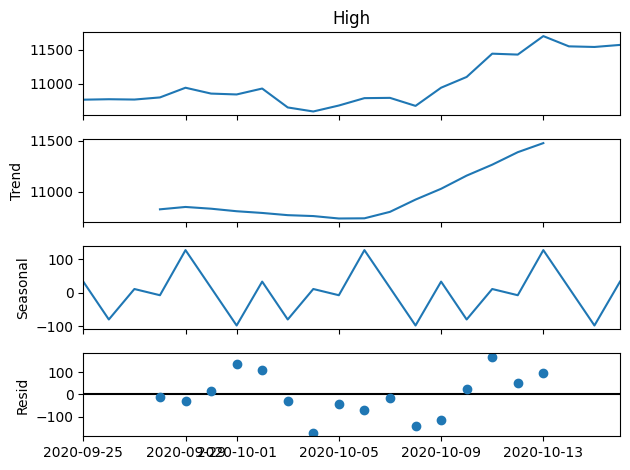

In [14]:
decomp=seasonal_decompose(bit_coint_select['High'])
fig=decomp.plot()
fig.figsize=(19,11)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [18]:
fuller_test=adfuller(bit_coint_select['High'])
fuller_test

(-0.705702625150374,
 0.845266894627043,
 7,
 14,
 {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 154.44795755413068)

In [19]:
def test_p_vale(data):
  fuller_test=adfuller(data)
  print('P-value',fuller_test[1])
  print('*------------------------------------------------------*')
  if fuller_test[1]<0.01:
    print('rechazar hipotesis nula, los datos son estacionales')
  else:
    print('no rechzar la hipotesis nula, los datos no son estacionarios')

test_p_vale(bit_coint_select['High'])

P-value 0.845266894627043
*------------------------------------------------------*
no rechzar la hipotesis nula, los datos no son estacionarios


<ipython-input-20-1496c0483ba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bit_coint_select['1st_dif']=bit_coint_select['High']-bit_coint_select['High'].shift(1)


<Axes: xlabel='Date'>

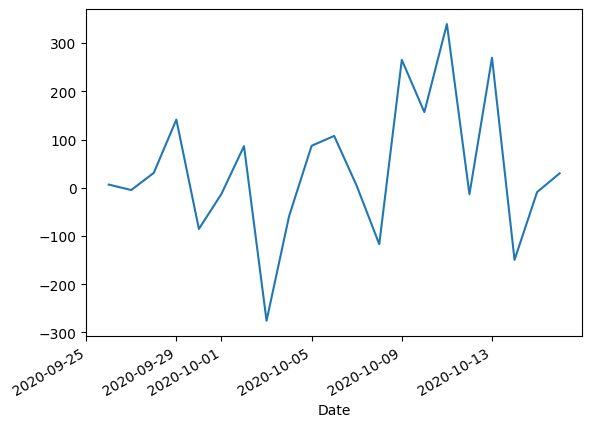

In [20]:
bit_coint_select['1st_dif']=bit_coint_select['High']-bit_coint_select['High'].shift(1)
bit_coint_select['1st_dif'].plot()

<ipython-input-21-4cd0bb82834c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bit_coint_select['2nd_dif']=bit_coint_select['High']-2*bit_coint_select['High'].shift(1)-bit_coint_select['High'].shift(2)


<Axes: xlabel='Date'>

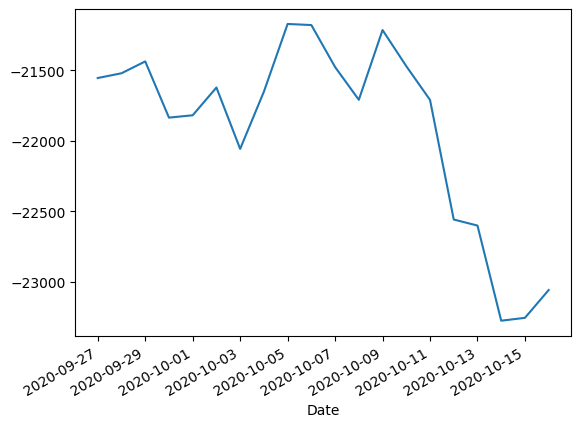

In [21]:
bit_coint_select['2nd_dif']=bit_coint_select['High']-2*bit_coint_select['High'].shift(1)-bit_coint_select['High'].shift(2)
bit_coint_select['2nd_dif'].plot()

In [22]:
test_p_vale(bit_coint_select['2nd_dif'].dropna())

P-value 0.005608951635460028
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

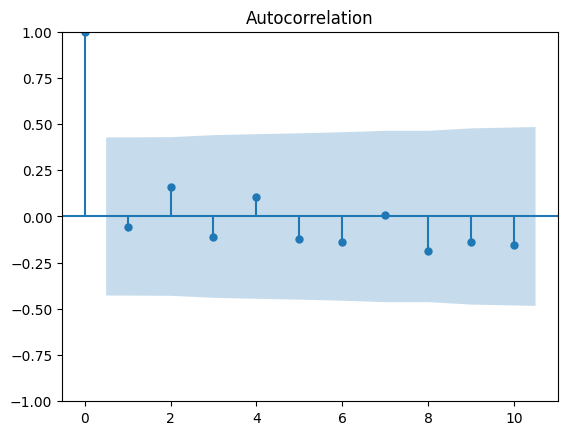

In [24]:
first_diff=plot_acf(bit_coint_select['1st_dif'].dropna())

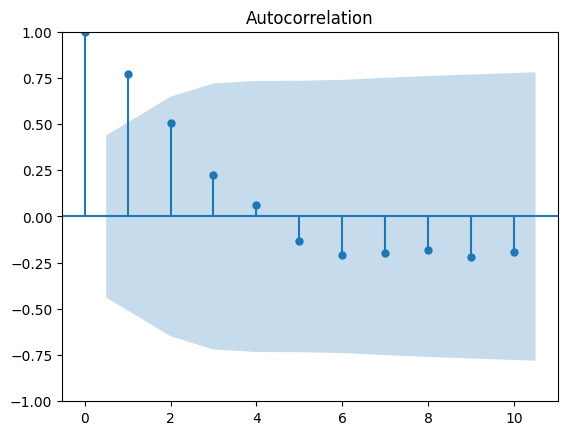

In [25]:
first_diff=plot_acf(bit_coint_select['2nd_dif'].dropna())

Configuración Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

Predicción: res.plot_predict(start='inicio', end='fin')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

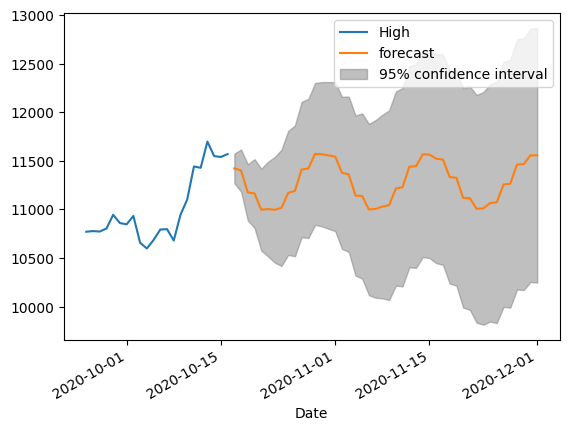

In [35]:
#############################################################
# Entrenamos el modelo con información de 2021-01 a 2021-08 #
#############################################################

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#2020-09-24':'2020-10-15
mod = ARIMA(bit_coint_select['High'], order=(5,1,5))
res = mod.fit()
fig, ax = plt.subplots()
ax = bit_coint_select['High'].loc['2020-09-24':].plot(ax=ax)
#plot_predict(res, '1990', '2012', ax=ax)
#fig = res.plot_predict(start='2021-01-06', end='2021-08-30')
fig=plot_predict(res, start='2020-10-16', end='2020-11-30', ax=ax)
plt.show()


In [36]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                   22
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -140.943
Date:                Tue, 07 May 2024   AIC                            303.886
Time:                        03:16:35   BIC                            315.376
Sample:                    09-24-2020   HQIC                           306.379
                         - 10-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9977      0.490     -2.034      0.042      -1.959      -0.037
ar.L2          1.3795      0.180      7.670      0.000       1.027       1.732
ar.L3          1.3822      0.694      1.992      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


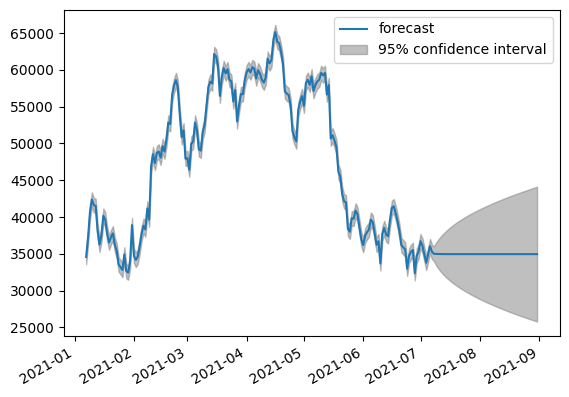

In [43]:
#############################################################
# Entrenamos el modelo con información de 2021-01 a 2021-08 #
#############################################################

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
mod = ARIMA(bitcoin['High'], order=(1,1,1))
res = mod.fit()

#res.plot_predict(start='2021-01-06', end='2021-08-30')
plot_predict(res, start='2021-01-06', end='2021-08-30')
plt.show()

Configuración Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

Predicción: res.plot_predict(start='inicio', end='fin')

<Axes: ylabel='Density'>

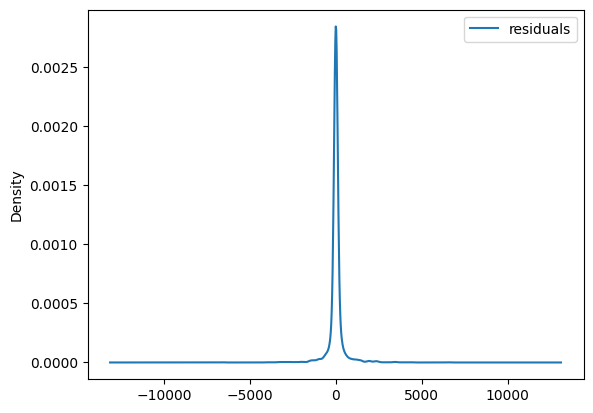

In [44]:
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [45]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2991
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22829.574
Date:                Tue, 07 May 2024   AIC                          45665.149
Time:                        03:32:11   BIC                          45683.158
Sample:                    04-29-2013   HQIC                         45671.628
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6215      0.029     21.644      0.000       0.565       0.678
ma.L1         -0.5206      0.031    -16.609      0.000      -0.582      -0.459
sigma2      2.518e+05   1465.890    171.776      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


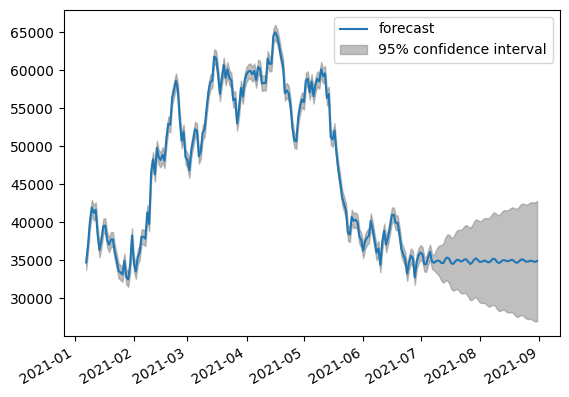

In [46]:
#############################################################
# Entrenamos el modelo con información de 2021-01 a 2021-08 #
#############################################################
#Configuración Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(bitcoin['High'], order=(7,1,7))
res = mod.fit()
#fig = res.plot_predict(start='2021-01-06', end='2021-08-30')
fig=plot_predict(res, start='2021-01-06', end='2021-08-30')
fig.show()

<Axes: ylabel='Density'>

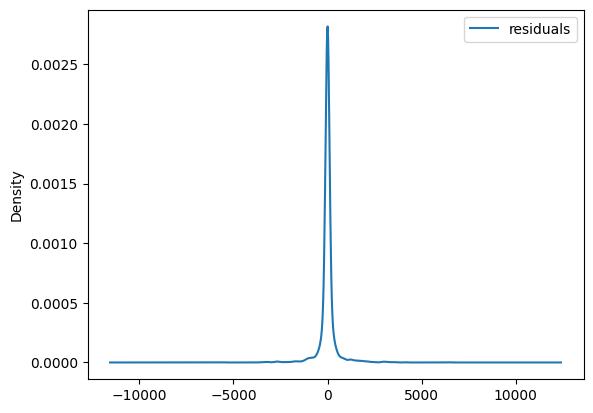

In [47]:
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [48]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2991
Model:                 ARIMA(7, 1, 7)   Log Likelihood              -22745.595
Date:                Tue, 07 May 2024   AIC                          45521.191
Time:                        03:33:43   BIC                          45611.236
Sample:                    04-29-2013   HQIC                         45553.585
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5453      0.043    -12.746      0.000      -0.629      -0.461
ar.L2         -0.1493      0.019     -7.702      0.000      -0.187      -0.111
ar.L3         -1.1697      0.023    -50.243      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

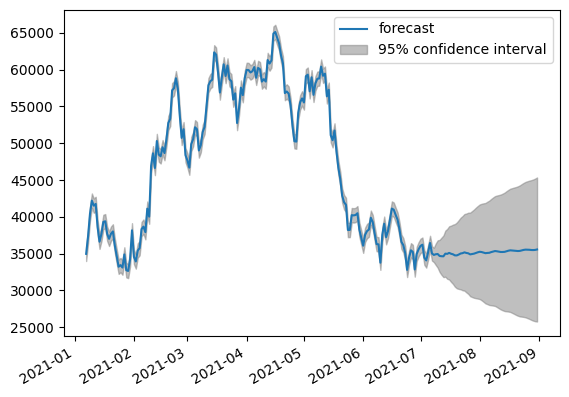

In [50]:
#############################################################
# Entrenamos el modelo con información de 2021-01 a 2021-08 #
#############################################################
#Configuración Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(bitcoin['High'], order=(12,1,8))
res = mod.fit()
#fig = res.plot_predict(start='2021-01-06', end='2021-08-30')
fig=plot_predict(res, start='2021-01-06', end='2021-08-30')
fig.show()

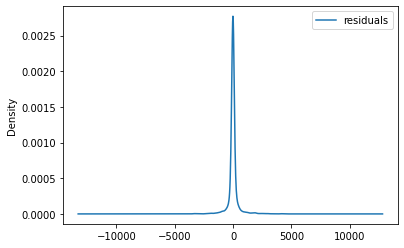

In [ ]:
residuals = pd.DataFrame(res.resid, columns=['residuals'])
residuals.plot(kind='kde')

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 2990
Model:                ARIMA(12, 1, 6)   Log Likelihood              -22743.669
Method:                       css-mle   S.D. of innovations            486.079
Date:                Tue, 17 May 2022   AIC                          45527.339
Time:                        00:16:48   BIC                          45647.399
Sample:                    04-30-2013   HQIC                         45570.532
                         - 07-06-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4414     11.328      1.010      0.313     -10.761      33.644
ar.L1.D.High      0.2003      0.118      1.698      0.090      -0.031       0.431
ar.L2.D.High     -0.6035      0.079     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ValueError: ignored

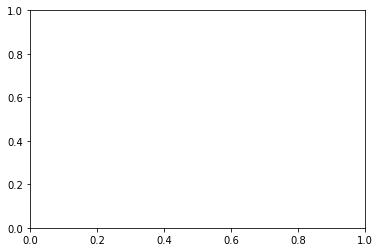

In [ ]:
#############################################################
# Entrenamos el modelo con información de 2021-01 a 2021-08 #
#############################################################
#Configuración Modelo: order('auto-regresion','periodos-estacionalidad','promedio-móvil')

from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(bitcoin['High'], order=(18,1,6))
res = mod.fit()
fig = res.plot_predict(start='2019-01-01', end='2019-12-31')
#2019-01-01':'2020-10-15
fig.show()